In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [4]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [5]:
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
df.shape

(13320, 9)

In [8]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [11]:
df1 = df.drop(['area_type','availability','balcony','society'], axis='columns')

In [12]:
df1

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


we start the data cleanin process now.

In [24]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [26]:
df2 = df1.dropna()

In [27]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [32]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

the code below is used for transformation of the size feature

In [37]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\PROBOOK 450\AppData\Local\Temp\ipykernel_16144\1142257054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


In [38]:
df2.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3


In [40]:
type(df2.bhk[0])

numpy.int64

In [41]:
df2[df2['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


the second row above is an example of not good behaviour where a 43 bedroom price is 2400 whiles 27 bedrooms is 8000. 
NOTE: write code that will be involved in DATA CLEANING OF SUCH BEHAVIOUR

In [42]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

1133 - 1384 as seen above is not a good behaviour, therefor, write code to do DATA WRANGLING\MUNGING. by taking the 
average of the two values

In [43]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [47]:
df2[~df2['total_sqft'].apply(lambda x: is_float(x))].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


34.46Sq. Meter, 4125Perch  is still a type of miscellenouse data point that needs to be corrected as well

In [72]:
def convert_sqft_to_num(x):
    try:
     tokens = x.split('-')
     if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
     else:
           return float(x) 
    except:
        return None

In [74]:
convert_sqft_to_num(23)

In [75]:
df3 = df2.copy()

In [78]:
df3.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4


In [80]:
df3['total_sqft'] = df3['total_sqft'].apply(lambda x: convert_sqft_to_num(x))

In [81]:
df3.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [82]:
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

THE CODE BELOW IS PERFORMING "FEATURE ENGINEERING" AN ASPECT OF DATA CLEANING

In [83]:
df4 = df3.copy()

In [84]:
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']

In [86]:
df4.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615


In [91]:
len(df4['location'].unique())

1304

there are 1304 uniqe records of locations. this creates high dimentionality problem, we need to find a way to reduce the datapoint


In [92]:
df4['location'] = df4['location'].apply(lambda x: x.strip())

In [95]:
location_stats = df4.groupby('location')['location'].agg('count')

In [96]:
location_stats

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1293, dtype: int64

In [97]:
len(location_stats)

1293

we will savely assume all the data points that are less than 10 should be categorize as other to reduce the dimentionality
problem

In [98]:
len(location_stats[location_stats <= 10])

1052

In [99]:
location_stats_less_than_10 = location_stats[location_stats <= 10]

In [101]:
location_stats_less_than_10.head(2)

location
1 Annasandrapalya    1
1 Giri Nagar         1
Name: location, dtype: int64

we will apply a transformation of all data point who are between 1-10 to "OTHER"

In [102]:
df4['location'] = df4['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [103]:
len(df4['location'].unique())

242

the code below is responsible for outlier detection and removal. these are errors or bad data points within the set

In [106]:
df4[df4.total_sqft/df4.bhk < 300].head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333


In [108]:
df4.shape

(13246, 7)

In [109]:
df5 = df4[~(df4.total_sqft/df4.bhk < 300)]

In [110]:
df5.shape

(12502, 7)

In [111]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

267.829813, and 176470.588235 are two extreme outliers that also need to be remove. the code below does that

In [112]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [113]:
df6 = remove_pps_outliers(df5)

In [114]:
df6.shape

(10241, 7)

notice the price of 2 bedroom is greater than that of 
3. this couild be a desired behaviour or an outlier in 
our case. we will remove such entries.

In [119]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (12,8)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green',marker='+',label='2 BHK',s=50)
    plt.ylabel('price')
    plt.xlabel('Total Square Feet Area')
    plt.title(location)
    plt.legend()

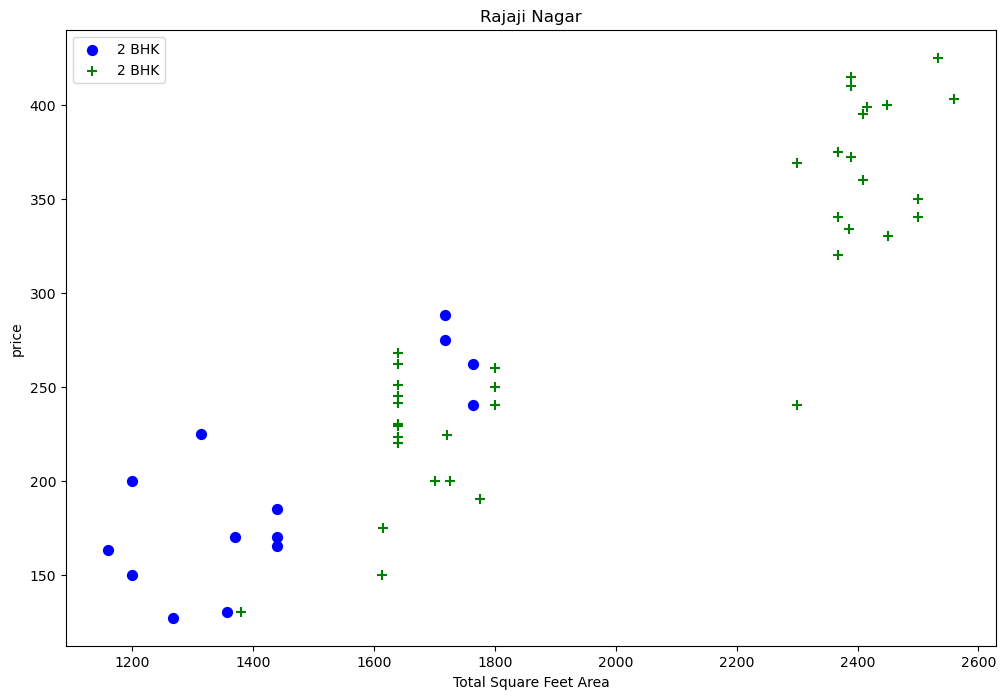

In [120]:
plot_scatter_chart(df6,"Rajaji Nagar")

i will create a function that removes the outliers
we will remove those 2 bhk apartments whose price_per_sqft is less than mean price_per_sqft of 1 bhk apartment.

In [121]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [122]:
df7 = remove_bhk_outliers(df5)

In [123]:
df7.shape

(8691, 7)

plot the scatter plot for the removed outliers 

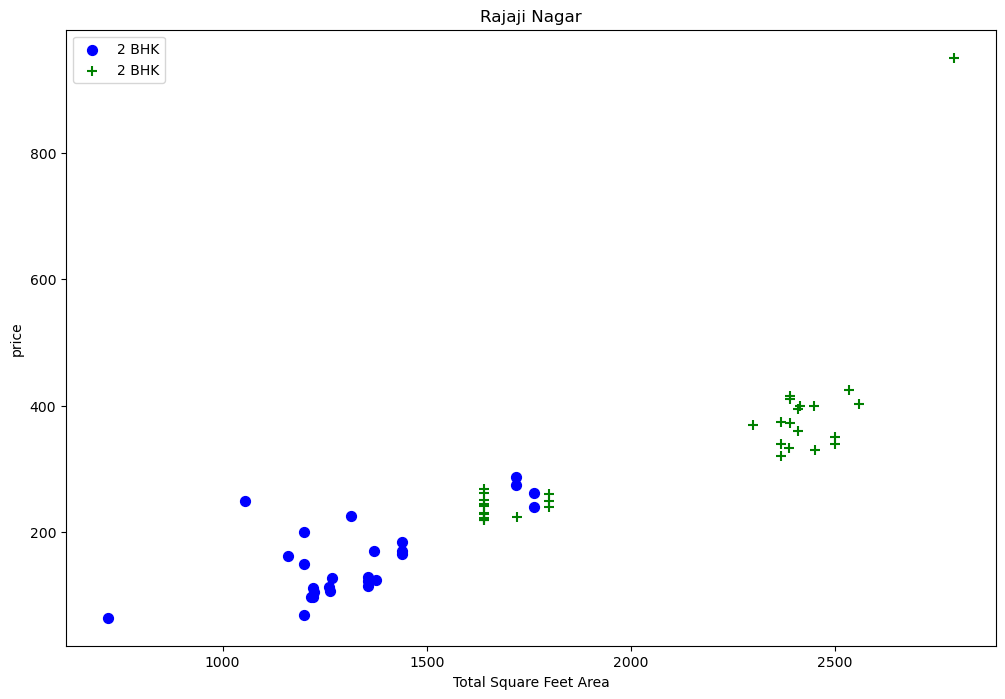

In [129]:
plot_scatter_chart(df7,"Rajaji Nagar")

Text(0.5, 0, 'Price per Square Feet')

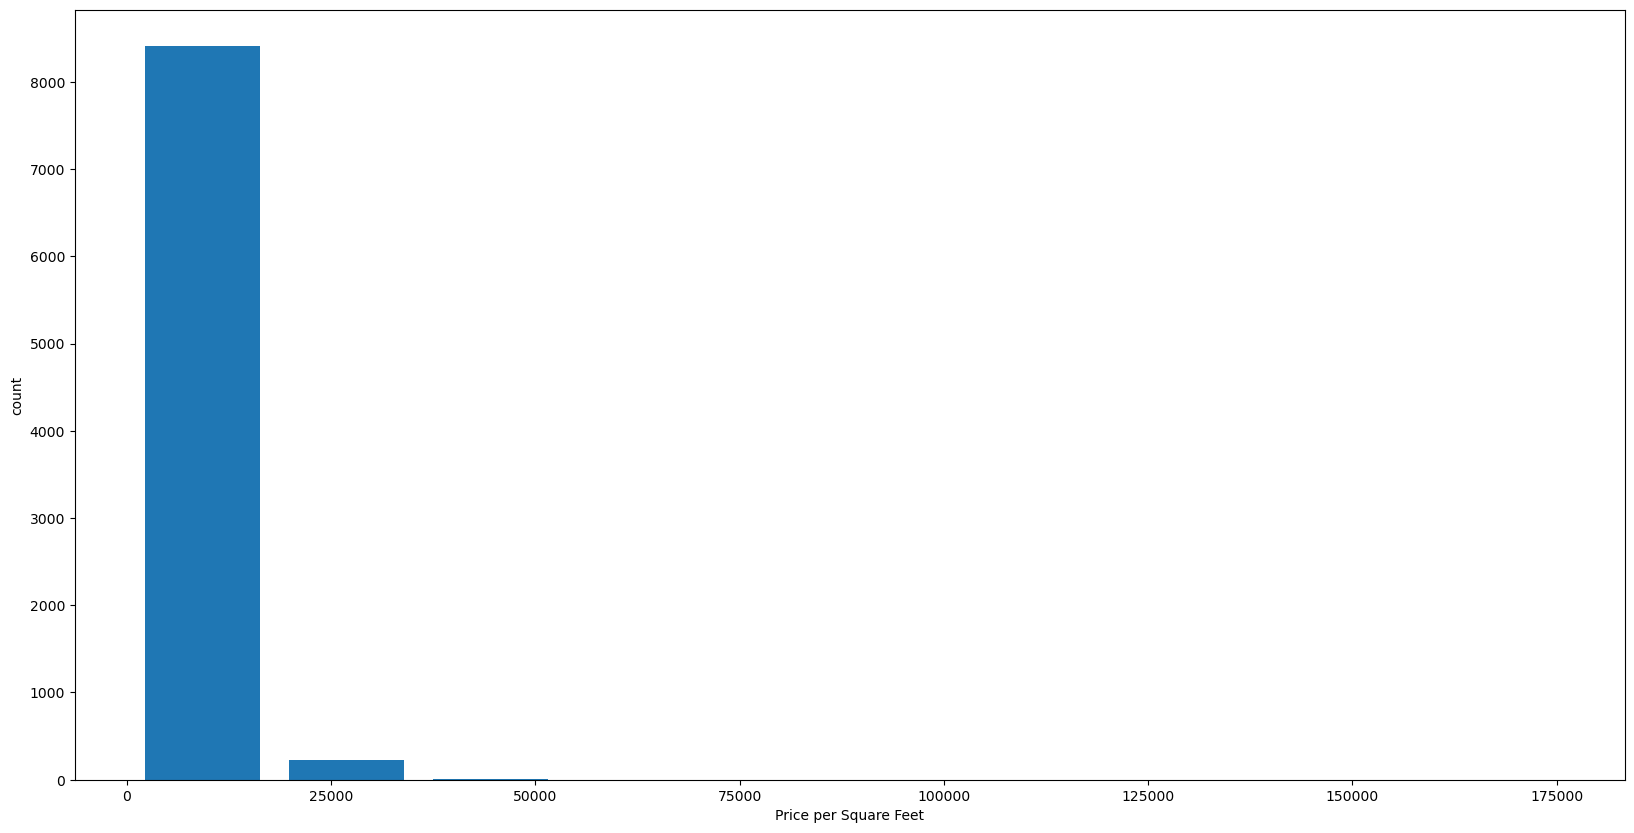

In [131]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.ylabel("count")
plt.xlabel("Price per Square Feet")

(array([5.227e+03, 2.142e+03, 1.113e+03, 1.300e+02, 5.700e+01, 1.400e+01,
        2.000e+00, 2.000e+00, 3.000e+00, 1.000e+00]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

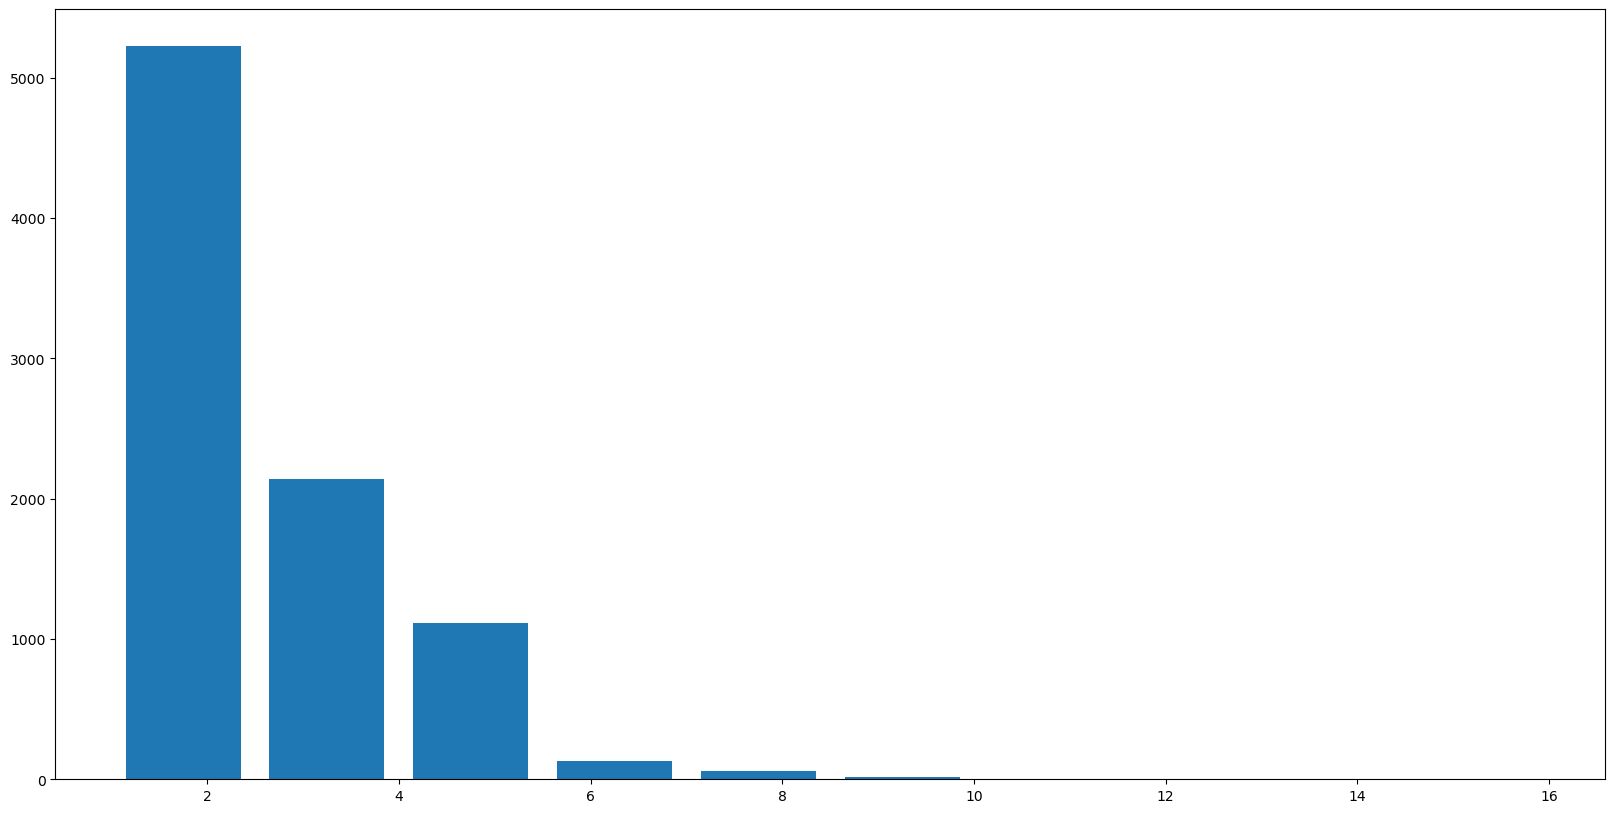

In [132]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.bath,rwidth=0.8)

In [133]:
df7[df7.bath>df7.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1078,other,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
6838,Rajaji Nagar,5 BHK,7500.0,8.0,1700.0,5,22666.666667
7709,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
9974,other,3 Bedroom,2400.0,6.0,775.0,3,32291.666667
11366,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
12103,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
12443,other,4 Bedroom,4350.0,8.0,2600.0,4,59770.114943
13067,other,10 Bedroom,7150.0,13.0,3600.0,10,50349.650350


the df above is another example of outliers where the number of baths is more than the number of bedrooms

In [136]:
df8 = df7[df7.bath<df7.bhk+2]

In [137]:
df8.shape

(8561, 7)

In [138]:
df9 = df8.drop(['size','price_per_sqft'],axis='columns')

In [144]:
df9.head(2)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
2,Uttarahalli,1440.0,2.0,62.00,3


In [146]:
dumies = pd.get_dummies(df9.location)

In [148]:
df10 = pd.concat([df9,dumies.drop('other',axis='columns')],axis='columns') 

In [149]:
df10.head(2)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Electronic City Phase II,1056.0,2.0,39.07,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Uttarahalli,1440.0,2.0,62.00,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [151]:
 df11 = df10.drop('location',axis='columns')

In [210]:
df11.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1440.0,2.0,62.00,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [211]:
x = df11.drop('price',axis='columns')

xx = x.fillna(3)


In [212]:
y = df11['price']

In [213]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(xx,y,test_size=0.2,random_state=10)

In [214]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.7322673999188185

In [215]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(),xx,y,cv=cv)

array([0.64134582, 0.69710929, 0.39893311, 0.61247636, 0.4778011 ])

NOTE: TAKE THE AVERAGE of the the above output test score to determine the performance of a particular classifier

we use GRIDSEARCH_CV To determin the best classifier to use on a particular dataset
as shown

In [216]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor



In [235]:
def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression':{
            'model': LinearRegression(),
            'params': {
                'fit_intercept':[True],
            }
        },
        'lasso':{
          'model': Lasso(),
           'params':{
               'alpha': [1,2],
                'selection':['random','cyclic']
           }
        },
        'decision_tree':{
            'model': DecisionTreeRegressor(),
             'params':{
                 'criterion':['mse','friedman_mse'],
                 'splitter': ['best','random']
             }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(xx,y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages\

,model,best_score,best_params
0,linear_regression,0.565533,{'fit_intercept': True}
1,lasso,0.512317,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.517475,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


from the output above, Linear regresion returns the best score, hence we choose it

In [240]:
xx.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [241]:
np.where(xx.columns=='2nd Phase Judicial Layout')[0][0]

5

In [242]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(xx.columns==location)[0][0]
    
    x = np.zeros(len(xx.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return lr_clf.predict([x])[0]

In [244]:
predict_price('Electronic City Phase II',1000,2,2)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


26.96599160485205

In [245]:
predict_price('Electronic City Phase II',1000,3,3)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


39.48183965751775

In [246]:
predict_price('Electronic City Phase II',1000,3,2)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


33.057300661637186

In [247]:
predict_price('Indira Nagar',1000,2,2)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


211.74727235204261

In [248]:
predict_price('Indira Nagar',1000,3,3)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


224.26312040470833

NOTE: In real life, use AB model testing for the build 
    model before exporting.
NOTE2: the code below will not use AB model Testing rather 
    will directly just save and export the file

In [249]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [254]:
import json
columns = {
    'data_columns':[col.lower() for col in xx.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))